# Machine Learning
> machine learning을 MLP, LinearRegression, Random Forest, XGBoost, Logistic Regression으로 학습

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import progressbar

In [2]:
test = pd.read_csv('test_3.csv')

In [3]:
test

,Unnamed: 0,time1,stationName,shared,기온,우천라벨링,풍속라벨링,hit,주변거치율,먼지라벨링,대중교통_minmax
0,0,2019-08-15 18:35:00,1001. 광진교 남단 사거리(디지털프라자앞),47.0,23.7,1,1,1,25.0,0,0.056182
1,1,2019-08-15 18:32:00,1001. 광진교 남단 사거리(디지털프라자앞),0.0,23.7,1,1,0,25.0,0,0.056182
2,2,2019-08-15 18:33:00,1001. 광진교 남단 사거리(디지털프라자앞),0.0,23.7,1,1,0,25.0,0,0.056182
3,3,2019-08-15 18:34:00,1001. 광진교 남단 사거리(디지털프라자앞),0.0,23.7,1,1,0,25.0,0,0.056182
4,4,2019-08-15 18:41:00,1001. 광진교 남단 사거리(디지털프라자앞),47.0,23.8,1,0,0,58.0,0,0.056182
5,5,2019-08-15 18:42:00,1001. 광진교 남단 사거리(디지털프라자앞),47.0,23.8,1,0,0,58.0,0,0.056182
6,6,2019-08-15 18:43:00,1001. 광진교 남단 사거리(디지털프라자앞),47.0,23.8,1,0,0,58.0,0,0.056182
7,7,2019-08-15 18:44:00,1001. 광진교 남단 사거리(디지털프라자앞),47.0,23.8,1,0,0,58.0,0,0.056182
8,8,2019-08-15 18:45:00,1001. 광진교 남단 사거리(디지털프라자앞),47.0,23.8,1,0,0,58.0,0,0.056182
9,9,2019-08-15 18:46:00,1001. 광진교 남단 사거리(디지털프라자앞),47.0,23.8,1,0,0,58.0,0,0.056182


In [3]:
우천라벨링 = pd.get_dummies(test.우천라벨링)
우천라벨링.columns = ['우천0', '우천1', '우천2']

In [4]:
풍속라벨링 = pd.get_dummies(test.풍속라벨링)
풍속라벨링.columns = ['풍속0', '풍속1', '풍속2']

--------

### test1: 우천이랑 풍속을 dummies로 바꾼 전체 피쳐
> 먼지 라벨링은 좋음에 비해 나쁨이 너무 적어서 (6개) 의미가 없을 것으로 판단되어 지움

In [6]:
test1 = test.drop(['우천라벨링', '풍속라벨링', '먼지라벨링'], axis=1)

In [7]:
test1 = pd.concat([test1, 우천라벨링, 풍속라벨링], axis=1)

In [9]:
test1.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
test1

,time1,stationName,shared,기온,hit,주변거치율,대중교통_minmax,우천0,우천1,우천2,풍속0,풍속1,풍속2,먼지0,먼지1,먼지2
0,2019-08-15 18:35:00,1001. 광진교 남단 사거리(디지털프라자앞),47.0,23.7,1,25.0,0.056182,0,1,0,0,1,0,1,0,0
1,2019-08-15 18:32:00,1001. 광진교 남단 사거리(디지털프라자앞),0.0,23.7,0,25.0,0.056182,0,1,0,0,1,0,1,0,0
2,2019-08-15 18:33:00,1001. 광진교 남단 사거리(디지털프라자앞),0.0,23.7,0,25.0,0.056182,0,1,0,0,1,0,1,0,0
3,2019-08-15 18:34:00,1001. 광진교 남단 사거리(디지털프라자앞),0.0,23.7,0,25.0,0.056182,0,1,0,0,1,0,1,0,0
4,2019-08-15 18:41:00,1001. 광진교 남단 사거리(디지털프라자앞),47.0,23.8,0,58.0,0.056182,0,1,0,1,0,0,1,0,0
5,2019-08-15 18:42:00,1001. 광진교 남단 사거리(디지털프라자앞),47.0,23.8,0,58.0,0.056182,0,1,0,1,0,0,1,0,0
6,2019-08-15 18:43:00,1001. 광진교 남단 사거리(디지털프라자앞),47.0,23.8,0,58.0,0.056182,0,1,0,1,0,0,1,0,0
7,2019-08-15 18:44:00,1001. 광진교 남단 사거리(디지털프라자앞),47.0,23.8,0,58.0,0.056182,0,1,0,1,0,0,1,0,0
8,2019-08-15 18:45:00,1001. 광진교 남단 사거리(디지털프라자앞),47.0,23.8,0,58.0,0.056182,0,1,0,1,0,0,1,0,0
9,2019-08-15 18:46:00,1001. 광진교 남단 사거리(디지털프라자앞),47.0,23.8,0,58.0,0.056182,0,1,0,1,0,0,1,0,0


> 기온, 주변거치율을  minmax scaling

In [12]:
기온 = np.asarray(test1.기온)
기온 = 기온.reshape(-1, 1)
scaler = MinMaxScaler()
scaler.fit(기온)
기온_minmax = scaler.transform(기온)

In [13]:
test1['기온_minmax'] = 기온_minmax

In [14]:
주변거치율 = np.asarray(test1.주변거치율)
주변거치율 = 주변거치율.reshape(-1, 1)
scaler = MinMaxScaler()
scaler.fit(주변거치율)
주변거치율_minmax = scaler.transform(주변거치율)

In [15]:
test1['주변거치율_minmax'] = 주변거치율_minmax

In [16]:
test1.drop(['기온', '주변거치율'], axis=1, inplace=True)

> 주변거치율_minmax에서 NaN 값을 뺌

In [17]:
test1 = test1[test1.주변거치율_minmax.isna()==False]

> time1을 datetime으로 바꾼 뒤에 시간대만 뽑아오자.

In [18]:
from datetime import datetime
test1['time1'] = pd.to_datetime(test1.time1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
test1['시간대'] = test1.time1.dt.strftime('%H')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# shared를 4가지 레이블로 나눔

In [20]:
test1['shared_label'] = test1['shared'].\
apply(lambda x: 0 if (x == 0)                                   
      else 1 if (x > 0 and x <30)                                       
      else 2 if (x >= 30 and x < 70)                                      
      else 3)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


-------

### final: 한시간대로 나눔

In [21]:
k = pd.date_range(start='20190804', end='20190819', freq='H')

In [22]:
from progressbar import progressbar
bar = progressbar.ProgressBar()
final = pd.DataFrame()

for i in bar(range(len(k)-1)):
    final = pd.concat([final, test1[test1.time1 == k[i]]], 
                      ignore_index=True)

100% |########################################################################|


In [36]:
final

,time1,stationName,shared,hit,대중교통_minmax,우천0,우천1,우천2,풍속0,풍속1,풍속2,먼지0,먼지1,먼지2,기온_minmax,주변거치율_minmax,시간대,shared_label
0,2019-08-04 00:00:00,1001. 광진교 남단 사거리(디지털프라자앞),7.0,0,0.056182,1,0,0,1,0,0,1,0,0,0.241026,0.044898,00,1
1,2019-08-04 00:00:00,1002. 해공공원(천호동),90.0,0,0.138755,1,0,0,1,0,0,1,0,0,0.241026,0.071429,00,3
2,2019-08-04 00:00:00,1003. 해공도서관앞,10.0,0,0.226513,1,0,0,1,0,0,1,0,0,0.241026,0.055102,00,1
3,2019-08-04 00:00:00,1004. 삼성광나루아파트 버스정류장,80.0,0,0.009843,1,0,0,1,0,0,1,0,0,0.241026,0.138776,00,3
4,2019-08-04 00:00:00,1006. 롯데캐슬 115동앞,13.0,0,0.103218,1,0,0,1,0,0,1,0,0,0.241026,0.073469,00,1
5,2019-08-04 00:00:00,1008. 암사역 3번출구(국민은행앞),130.0,0,0.061418,1,0,0,1,0,0,1,0,0,0.241026,0.095918,00,3
6,2019-08-04 00:00:00,1009. 천호역4번출구(현대백화점),15.0,0,0.116004,1,0,0,1,0,0,1,0,0,0.241026,0.028571,00,1
7,2019-08-04 00:00:00,1010. 강동세무서,15.0,0,0.090910,1,0,0,1,0,0,1,0,0,0.241026,0.220408,00,1
8,2019-08-04 00:00:00,1011. LIGA 아파트 앞,95.0,0,0.123520,1,0,0,1,0,0,1,0,0,0.241026,0.130612,00,3
9,2019-08-04 00:00:00,1012. 서울 상운차량,40.0,0,0.012441,1,0,0,1,0,0,1,0,0,0.241026,0.059184,00,2


In [143]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553176 entries, 0 to 553175
Data columns (total 18 columns):
time1           553176 non-null datetime64[ns]
stationName     553176 non-null object
shared          553176 non-null float64
hit             553176 non-null int64
대중교통_minmax     553176 non-null float64
우천0             553176 non-null uint8
우천1             553176 non-null uint8
우천2             553176 non-null uint8
풍속0             553176 non-null uint8
풍속1             553176 non-null uint8
풍속2             553176 non-null uint8
먼지0             553176 non-null uint8
먼지1             553176 non-null uint8
먼지2             553176 non-null uint8
기온_minmax       553176 non-null float64
주변거치율_minmax    553176 non-null float64
시간대             553176 non-null object
shared_label    553176 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(2), uint8(9)
memory usage: 42.7+ MB


----

# final 데이터로 학습 (shared를 4가지 라벨링)
> ## MLPClassifier

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [135]:
X = final.drop\
(['time1', 'stationName', 'shared', '시간대','shared_label'], axis=1)
y = final.shared_label

In [136]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=0)

In [70]:
clf = MLPClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [72]:
accuracy_score(y_test, y_pred)

0.43482793321000524

> ## Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
rf_clf = RandomForestClassifier(n_estimators=70)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.4454574487957434

In [142]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.4456080938578995

> ## GridSearchCV

In [85]:
from sklearn.model_selection import GridSearchCV

In [127]:
params = {
    'n_estimators': [70, 90, 100],
    #'max_depth': [3, 5, 7],
    'n_jobs': [-1]
}

In [128]:
grid_rf = GridSearchCV(rf_clf,
                      param_grid = params,
                      cv=5,
                      n_jobs = -1
                      )

In [130]:
grid_rf.fit(X_train, y_train)
grid_rf.score(X_test, y_test)

0.45991937476273403

In [131]:
grid_rf.best_params_

{'n_estimators': 100, 'n_jobs': -1}

In [132]:
f_imp = pd.DataFrame(grid_rf.best_estimator_.feature_importances_,
            index = X_train.columns,
            columns = ['importance'])

In [133]:
%matplotlib inline

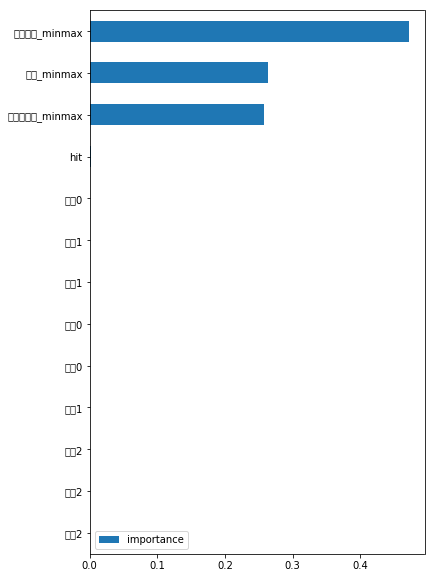

In [134]:
f_imp.sort_values(by= 'importance').\
    plot(kind = 'barh', figsize = (6, 10))

> ## 회귀분석
- 그 전에 시간대를 numeric으로 변경

In [151]:
final.시간대 = pd.to_numeric(final.시간대, downcast='signed')

In [155]:
import sklearn.linear_model as lm
lr = lm.LinearRegression()

In [179]:
X = final[['대중교통_minmax', '기온_minmax', '주변거치율_minmax']]
y = final.shared

In [180]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=0)

In [181]:
reg = lr.fit(X_train, y_train)

In [182]:
y_pred = reg.predict(X_test)

In [185]:
r2 = mt.r2_score(y_test, y_pred)
print('R2: ', r2)

R2:  0.16334899486668952


> ## OLS

In [187]:
import statsmodels.api as sm

In [190]:
X_train = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train)
reg = lr.fit()

X_test = sm.add_constant(X_test)
y_pred = reg.predict(X_test)

In [192]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 shared   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                 2.494e+04
Date:                Wed, 28 Aug 2019   Prob (F-statistic):               0.00
Time:                        23:26:22   Log-Likelihood:            -2.1095e+06
No. Observations:              387223   AIC:                         4.219e+06
Df Residuals:                  387219   BIC:                         4.219e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           28.1833      0.306     92.037   

---------

# final_f 로 학습 (shared를 두가지로 라벨링)
> ## Logistic Regression
* shared를 20 기준으로 없음 있음

In [194]:
final_f = final.drop('shared_label', axis=1)

In [197]:
final_f['yesno'] = final_f.shared.apply(lambda x: 0 if x <= 20
                                       else 1)

In [198]:
final_f

,time1,stationName,shared,hit,대중교통_minmax,우천0,우천1,우천2,풍속0,풍속1,풍속2,기온_minmax,주변거치율_minmax,시간대,yesno
0,2019-08-04 00:00:00,1001. 광진교 남단 사거리(디지털프라자앞),7.0,0,0.056182,1,0,0,1,0,0,0.241026,0.044898,0,0
1,2019-08-04 00:00:00,1002. 해공공원(천호동),90.0,0,0.138755,1,0,0,1,0,0,0.241026,0.071429,0,1
2,2019-08-04 00:00:00,1003. 해공도서관앞,10.0,0,0.226513,1,0,0,1,0,0,0.241026,0.055102,0,0
3,2019-08-04 00:00:00,1004. 삼성광나루아파트 버스정류장,80.0,0,0.009843,1,0,0,1,0,0,0.241026,0.138776,0,1
4,2019-08-04 00:00:00,1006. 롯데캐슬 115동앞,13.0,0,0.103218,1,0,0,1,0,0,0.241026,0.073469,0,0
5,2019-08-04 00:00:00,1008. 암사역 3번출구(국민은행앞),130.0,0,0.061418,1,0,0,1,0,0,0.241026,0.095918,0,1
6,2019-08-04 00:00:00,1009. 천호역4번출구(현대백화점),15.0,0,0.116004,1,0,0,1,0,0,0.241026,0.028571,0,0
7,2019-08-04 00:00:00,1010. 강동세무서,15.0,0,0.090910,1,0,0,1,0,0,0.241026,0.220408,0,0
8,2019-08-04 00:00:00,1011. LIGA 아파트 앞,95.0,0,0.123520,1,0,0,1,0,0,0.241026,0.130612,0,1
9,2019-08-04 00:00:00,1012. 서울 상운차량,40.0,0,0.012441,1,0,0,1,0,0,0.241026,0.059184,0,1


In [208]:
X = final_f.drop(['time1', 'stationName', 'shared', 'yesno'], axis=1)
y = final_f.yesno

In [209]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=0)

In [212]:
logr = lm.LogisticRegression(solver='liblinear')
reg = logr.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [213]:
accuracy = mt.accuracy_score(y_test, y_pred)
r2 = mt.r2_score(y_test, y_pred)
print('accuracy is', accuracy)
print('R2 is', r2)

accuracy is 0.7269889667556477
R2 is -0.21266469871399174


> ## Random Forest (2)

In [214]:
rf_clf = RandomForestClassifier(n_estimators=70)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.736865257030605

In [215]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.7388839008634975

> ## MLP (2)

In [216]:
clf = MLPClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7285195205871542

> ## XGBoost (2)

In [217]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(tree_method='exact', booster='gbtree',
                       n_estimators=200)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, tree_method='exact', verbosity=1)

In [218]:
y_pred = xgb_clf.predict(X_test)

In [219]:
accuracy_score(y_test, y_pred)

0.7381065723427718